<a href="https://colab.research.google.com/github/Roksana18cse04/DataAnalysisProject/blob/main/JobMarketTrendingJob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Job Market Trending Job for Bangladesh**
In this project, we aim to analyze job market trends using datasets from popular job portals like bdjobs and careerjet. The analysis focuses on identifying key insights such as the most in-demand job titles, popular industries, and required skills in the market. We will explore data on job categories, locations, company names, and salary distributions (if available). The goal is to understand how the job market is evolving, which sectors are growing, and what skills are becoming crucial for job seekers. By visualizing trends and summarizing the findings, we can offer actionable insights for both employers and candidates.

# **About Data** <br>
- ***Job Listings:*** The dataset contains detailed job listings from platforms like bdjobs and careerjet, including information such as job titles, descriptions, and categories.

- ***Location Data:*** It includes geographic information related to job postings, helping identify regions with the most job opportunities.

- ***Skill Requirements:*** The data highlights required skills for various job roles, providing insights into in-demand technical and soft skills.

- ***Employer Information:*** The dataset lists companies or employers offering the jobs, allowing an analysis of the most active recruiters in the market.

- ***Additional Attributes:*** It may also contain other relevant fields like job types (full-time/part-time), experience level, salary ranges, and job posting dates, useful for analyzing trends over time.


The **Job Market Trending Job Data Analysis** project focuses on analyzing multiple job market datasets to uncover trends and patterns. Here’s an overview of the **datasets** used:

1. **bdjobs.csv**:  
   - Contains job listings from one of the largest job portals in Bangladesh.
   - Includes fields like job titles, categories, company names, job locations, and required skills.
   - Used to explore job demand across industries, cities, and skills in the Bangladeshi job market.

2. **careerjet.csv**:  
   - Features job listings from a global job search engine.
   - Provides information on job types, company names, locations, and required experience.
   - Useful for comparing global job market trends and in-demand roles across different regions.

3. **skill.csv**:  
   - Focuses on skill requirements extracted from job postings.
   - Highlights the technical and non-technical skills employers are looking for.
   - Helps analyze the changing skill demands in the job market and align training efforts accordingly.

Together, these datasets provide a comprehensive view of job market trends, enabling us to analyze the demand for certain skills, job categories, and locations across different regions.

# **Data Collection**
- bdjobs DataSet
- careerjet DataSet
- skilljob DataSet

In [198]:
# importing section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings('ignore')

In [199]:
import os
print(os.getcwd())
print(os.listdir())

/content
['.config', '.ipynb_checkpoints', 'careerjet.csv', 'bdjobs.csv', 'skill.csv', 'integrated_job_data.csv', 'cleaned_job_data.csv', 'sample_data']


**Data Cleanning**

In [200]:

# Load CSV files into DataFrames
bdjobs_df = pd.read_csv('bdjobs.csv', encoding='latin-1')
careerjet_df = pd.read_csv('careerjet.csv',encoding='latin-1')
skilljob_df = pd.read_csv('skill.csv',encoding='latin-1')


In [201]:
bdjobs_df.shape


(4524, 22)

In [202]:
careerjet_df.shape

(2004, 8)

In [203]:
skilljob_df.shape

(2006, 9)

In [204]:
# View the first few rows of each dataset
print(bdjobs_df.head())
print(careerjet_df.head())
print(skilljob_df.head())

# Check for missing values and data types
print(bdjobs_df.info())
print(careerjet_df.info())
print(skilljob_df.info())


                                      Job name  \
0                     ????????? ?????? (?????)   
1         Assistant Manager (Textile Division)   
2     Senior Officer - Skills to Succeed (S2S)   
3                                          NaN   
4  Manager / Sr. Manager - HR & Sustainability   

                                    Description Link  \
0  https://jobs.bdjobs.com/jobdetails.asp?id=1132...   
1  https://jobs.bdjobs.com/jobdetails.asp?id=1133...   
2  https://jobs.bdjobs.com/jobdetails.asp?id=1133...   
3                                                NaN   
4  https://jobs.bdjobs.com/jobdetails.asp?id=1132...   

                         Company Name Location          Experience   \
0  ?? ?? ????? ?????????????? ???????    ?????           exp-text-d   
1         Asons Bangladesh (Pvt) Ltd.   Uttara       0 to 2 year(s)   
2                   Save the Children    Dhaka  At least 10 year(s)   
3                                 NaN      NaN   At least 4 year(s)   
4      

### 3. Data Cleaning Steps
**a. Remove Duplicates**
Remove any duplicate rows in each dataset.

In [205]:
bdjobs_df = bdjobs_df.drop_duplicates()
careerjet_df = careerjet_df.drop_duplicates()
skilljob_df = skilljob_df.drop_duplicates()


# b. Handle Missing Values
Identify and handle missing values. Depending on the nature of the data, you might fill in missing values or drop rows/columns with excessive missing data.

In [206]:
# Fill missing values with a placeholder or appropriate value
bdjobs_df = bdjobs_df.fillna('Unknown')
careerjet_df = careerjet_df.fillna('Unknown')
skilljob_df = skilljob_df.fillna('Unknown')

# Alternatively, drop rows/columns with missing values
bdjobs_df = bdjobs_df.dropna()
careerjet_df = careerjet_df.dropna()
skilljob_df = skilljob_df.dropna()


In [207]:
print(bdjobs_df.columns)
print(careerjet_df.columns)
print(skilljob_df.columns)


Index(['Job name', 'Description Link', 'Company Name', 'Location',
       'Experience ', 'Education Qualification', 'Year', 'Deadline',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21'],
      dtype='object')
Index(['job', 'job href', 'save-job', 'location', 'icon href 2', 'desc',
       'badge', 'badge 2'],
      dtype='object')
Index(['Job Title', 'Job description Link', 'badge', 'Company name',
       'Company Profile Link', 'Deadline ', 'Location', 'Job Type',
       'Salary Amount'],
      dtype='object')


In [208]:
# Example: Correct common misspellings or inconsistent naming
bdjobs_df['Company Name'] = bdjobs_df['Company Name'].str.strip().str.title()
careerjet_df['job'] = careerjet_df['job'].str.strip().str.title()
skilljob_df['Location'] = skilljob_df['Location'].str.strip().str.title()


### **d. Standardize Formats**
Ensure consistency in data formats.

In [209]:
print(bdjobs_df.columns)

Index(['Job name', 'Description Link', 'Company Name', 'Location',
       'Experience ', 'Education Qualification', 'Year', 'Deadline',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21'],
      dtype='object')


In [210]:
print(bdjobs_df['Deadline'].head())
print(bdjobs_df['Deadline'].unique())

0     28-Mar
1     13-Apr
2     13-Apr
3    Unknown
4     12-Apr
Name: Deadline, dtype: object
['28-Mar' '13-Apr' 'Unknown' '12-Apr' '27-Mar' '25-Mar' '30-Mar' '24-Mar'
 '23-Mar' '10-Apr' '20-Mar' '31-Mar' '1-Apr' '26-Mar' '22-Mar' '21-Mar'
 '29-Mar' '8-Apr' '11-Apr' '5-Apr' '16-Mar' '18-Mar' '"job-title-text'
 '17-Mar' '19-Mar' '2-Apr' '3-Apr' '6-Apr' '7-Apr' '"comp_logo src'
 '14-Apr' 'https://corporate.bdjobs.com/logos/37880.jpg'
 'https://corporate.bdjobs.com/logos/98321_0.jpg'
 'https://corporate.bdjobs.com/logos/99710_3.jpg'
 'https://corporate.bdjobs.com/logos/104408_0.jpg'
 'https://corporate.bdjobs.com/logos/33585_0.png'
 'https://corporate.bdjobs.com/logos/54579_1.jpg'
 'https://corporate.bdjobs.com/logos/22590_0.png'
 'https://corporate.bdjobs.com/logos/27227_6.jpeg'
 'https://corporate.bdjobs.com/logos/67296_0.png'
 'https://corporate.bdjobs.com/logos/98407_0.png'
 'https://corporate.bdjobs.com/logos/24854_1.jpg'
 'https://corporate.bdjobs.com/logos/99590_1.jpg'
 'https://c

In [211]:
bdjobs_df['Deadline'] = bdjobs_df['Deadline'].replace(['N/A', ''], pd.NaT)
bdjobs_df['Deadline']

,Deadline
0,28-Mar
1,13-Apr
2,13-Apr
3,Unknown
4,12-Apr
...,...
4389,Unknown
4390,Unknown
4391,Unknown
4392,Bachelor degree in any discipline


In [212]:
bdjobs_df['Deadline'] = pd.to_datetime(bdjobs_df['Deadline'], format='%B %d, %Y', errors='coerce')

In [213]:
bdjobs_df['Date Posted'] = bdjobs_df['Deadline'] - pd.DateOffset(days=30)

In [214]:
careerjet_df.columns

Index(['job', 'job href', 'save-job', 'location', 'icon href 2', 'desc',
       'badge', 'badge 2'],
      dtype='object')

In [215]:
careerjet_df['Date Posted'] = None

In [216]:
skilljob_df.columns

Index(['Job Title', 'Job description Link', 'badge', 'Company name',
       'Company Profile Link', 'Deadline ', 'Location', 'Job Type',
       'Salary Amount'],
      dtype='object')

In [217]:
skilljob_df['Date Posted'] = pd.to_datetime(skilljob_df['Deadline '], format='%Y-%m-%d', errors='coerce')

In [218]:
skilljob_df['Date Posted'] = pd.to_datetime('2023-10-27')


In [219]:
bdjobs_df = bdjobs_df.rename(columns={'Job name': 'Job Title'})
careerjet_df = careerjet_df.rename(columns={'job': 'Job Title'})

In [220]:
# Example: Standardize date formats
bdjobs_df['Date Posted'] = pd.to_datetime(bdjobs_df['Date Posted'], format='%Y-%m-%d')
careerjet_df['Date Posted'] = pd.to_datetime(careerjet_df['Date Posted'], format='%Y-%m-%d')
skilljob_df['Date Posted'] = pd.to_datetime(skilljob_df['Date Posted'], format='%Y-%m-%d')

# Example: Normalize text data (lowercase)
bdjobs_df['Job Title'] = bdjobs_df['Job Title'].str.lower()
careerjet_df['Job Title'] = careerjet_df['Job Title'].str.lower()
skilljob_df['Job Title'] = skilljob_df['Job Title'].str.lower()


### e. Remove Unnecessary Columns
Drop columns that are not needed for your analysis.

In [221]:
bdjobs_df = bdjobs_df.drop(columns=[col for col in bdjobs_df.columns if 'Unnamed' in col])

careerjet_df = careerjet_df.drop(columns=['job href','save-job','icon href 2','badge','badge 2'])

skilljob_df = skilljob_df.drop(columns=['Job description Link','Company Profile Link','badge'])


marge DataSet

In [222]:
combined_df = pd.concat([bdjobs_df, careerjet_df, skilljob_df], ignore_index=True)
combined_df

,Job Title,Description Link,Company Name,Location,Experience,Education Qualification,Year,Deadline,Date Posted,location,desc,Company name,Deadline,Job Type,Salary Amount
0,????????? ?????? (?????),https://jobs.bdjobs.com/jobdetails.asp?id=1132...,?? ?? ????? ?????????????? ???????,?????,exp-text-d,Unknown,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,assistant manager (textile division),https://jobs.bdjobs.com/jobdetails.asp?id=1133...,Asons Bangladesh (Pvt) Ltd.,Uttara,0 to 2 year(s),GCE (A/L) / Diploma in Textile Technology,Unknown,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,senior officer - skills to succeed (s2s),https://jobs.bdjobs.com/jobdetails.asp?id=1133...,Save The Children,Dhaka,At least 10 year(s),"Master`s Degree in any subject, preferably in ...",2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,unknown,Unknown,Unknown,Unknown,At least 4 year(s),Unknown,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,manager / sr. manager - hr & sustainability,https://jobs.bdjobs.com/jobdetails.asp?id=1132...,Bitopi Group,Cumilla,Unknown,Bachelor degree in any discipline,2023,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7273,jr. oracle apex programmer,NaN,NaN,Dhaka (Uttara),NaN,NaN,NaN,NaT,2023-10-27,NaN,NaN,ATI Limited,Wed Nov 16 2022,Full Time,Negotiable
7274,digital marketing strategist,NaN,NaN,Dhaka (Uttara),NaN,NaN,NaN,NaT,2023-10-27,NaN,NaN,Addition Communications Ltd,Mon Nov 28 2022,Full Time,Negotiable
7275,senior software engineer ios,NaN,NaN,Dhaka,NaN,NaN,NaN,NaT,2023-10-27,NaN,NaN,BJIT Limited,Fri Jan 20 2023,Full Time,Negotiable
7276,data analyst,NaN,NaN,Dhaka,NaN,NaN,NaN,NaT,2023-10-27,NaN,NaN,BZM Graphics,Mon Jan 23 2023,Full Time,20000 - 40000


In [223]:
# Save cleaned data to new CSV files
combined_df.to_csv('cleaned_job_data.csv', index=False)


# Data Intregation
a. Identify Common Fields
First, identify the common fields between the datasets. These are typically: <br>

- Job Title
- Company Name
- Location
- Date Posted
- Skills
- Salary (if available)


Ensure these fields exist and are consistent across datasets.

### b. Align Column Names
If the column names are different across the datasets (e.g., "Job Title" in one dataset, "Position" in another), you need to standardize them.

In [224]:
# Rename columns for consistency
bdjobs_df = bdjobs_df.rename(columns={
    'Position': 'Job Title',
    'Organization': 'Company Name',
    'Area': 'Location',
})

careerjet_df = careerjet_df.rename(columns={
    'Title': 'Job Title',
    'Company': 'Company Name',
    'Region': 'Location',
})

skilljob_df = skilljob_df.rename(columns={
    'Job': 'Job Title',
    'Employer': 'Company Name',
    'Place': 'Location',
})


### c. Add a Source Column (Optional)
To track where each row originated from, you can add a Source column.

In [225]:
# Add a Source column to each dataset
bdjobs_df['Source'] = 'BD Jobs'
careerjet_df['Source'] = 'CareerJet'
skilljob_df['Source'] = 'SkillJob'


In [226]:
#d. Concatenate the Datasets
# Combine datasets into one DataFrame
combined_df = pd.concat([bdjobs_df, careerjet_df, skilljob_df], ignore_index=True)


In [227]:
#e. Handle Duplicates
# Remove duplicates based on key columns
combined_df = combined_df.drop_duplicates(subset=['Job Title', 'Company Name', 'Location'])
combined_df.sample(2)

,Job Title,Description Link,Company Name,Location,Experience,Education Qualification,Year,Deadline,Date Posted,Source,location,desc,Company name,Deadline,Job Type,Salary Amount
5899,"officer/sr. officer, market research",NaN,NaN,Dhaka,NaN,NaN,NaN,NaT,2023-10-27,SkillJob,NaN,NaN,Meghna Group of Industries,Wed Feb 15 2023,Full Time,Negotiable
733,asst . merchandiser - woven (tops),https://jobs.bdjobs.com/jobdetails.asp?id=1131...,Dekko Isho Group,Sreepur,At least 4 year(s),Bachelor of Science (BSc) in Textile,2023,NaT,NaT,BD Jobs,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
# Example: standardizing location names
combined_df['Location'] = combined_df['Location'].replace({
    'Dhaka City': 'Dhaka',
    'Chittagong': 'Chattogram',
    'Ctg': 'Chattogram'
})


# verify combined data

In [229]:
# Verify the structure and summary
print(combined_df.info())
print(combined_df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 6493 entries, 0 to 7277
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Job Title                6493 non-null   object        
 1   Description Link         2805 non-null   object        
 2   Company Name             2805 non-null   object        
 3   Location                 4735 non-null   object        
 4   Experience               2805 non-null   object        
 5   Education Qualification  2805 non-null   object        
 6   Year                     2805 non-null   object        
 7   Deadline                 0 non-null      datetime64[ns]
 8   Date Posted              1930 non-null   datetime64[ns]
 9   Source                   6493 non-null   object        
 10  location                 1758 non-null   object        
 11  desc                     1758 non-null   object        
 12  Company name             1930 non-null 

In [230]:
# Save to CSV
combined_df.to_csv('integrated_job_data.csv', index=False)



# Result: Integrated Dataset
At the end of the integration process, you'll have a single, clean dataset combining job postings from BD Jobs, CareerJet, and SkillJob. This dataset will be ready for trend analysis, machine learning, or further exploration.

In [231]:
# Create a dictionary mapping similar job titles to a standard title
job_title_mapping = {
    'Software Engineer': 'Software Developer',
    'Software Developer': 'Software Developer',
    'Data Scientist': 'Data Analyst',
    'Data Analyst': 'Data Analyst',
    'Web Developer': 'Frontend Developer',
    'Frontend Developer': 'Frontend Developer',
    'Project Manager': 'Project Manager',
    'Scrum Master': 'Project Manager'
}

# Apply the mapping to the 'Job Title' column
combined_df['Job Title'] = combined_df['Job Title'].replace(job_title_mapping)


In [232]:
# Define a function to standardize skill names
def standardize_skills(skills):
    skill_mapping = {
        'JavaScript': 'JS',
        'JS': 'JS',
        'Python': 'Python',
        'SQL': 'SQL',
        'HTML': 'HTML',
        'CSS': 'CSS',
        'Agile': 'Agile',
        'Scrum': 'Agile',
        'React': 'React'
    }

    # Split skills and map each one to a standardized version
    standardized_skills = [skill_mapping.get(skill.strip(), skill) for skill in skills.split(',')]
    return ', '.join(standardized_skills)


In [233]:
def standardize_skills(skills):
  if isinstance(skills, str):
    return skills.lower().strip()
  else:
    return skills


In [234]:
# Check unique job titles
print(combined_df['Job Title'].unique())



['????????? ?????? (?????)' 'assistant manager (textile division)'
 'senior officer - skills to succeed (s2s)' ...
 'jr. oracle apex programmer' 'digital marketing strategist'
 'senior software engineer ios']


In [235]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6493 entries, 0 to 7277
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Job Title                6493 non-null   object        
 1   Description Link         2805 non-null   object        
 2   Company Name             2805 non-null   object        
 3   Location                 4735 non-null   object        
 4   Experience               2805 non-null   object        
 5   Education Qualification  2805 non-null   object        
 6   Year                     2805 non-null   object        
 7   Deadline                 0 non-null      datetime64[ns]
 8   Date Posted              1930 non-null   datetime64[ns]
 9   Source                   6493 non-null   object        
 10  location                 1758 non-null   object        
 11  desc                     1758 non-null   object        
 12  Company name             1930 non-null 

In [236]:
combined_df.columns

Index(['Job Title', 'Description Link', 'Company Name', 'Location',
       'Experience ', 'Education Qualification', 'Year', 'Deadline',
       'Date Posted', 'Source', 'location', 'desc', 'Company name',
       'Deadline ', 'Job Type', 'Salary Amount'],
      dtype='object')

In [238]:
combined_df.columns

Index(['Job Title', 'Description Link', 'Company Name', 'Location',
       'Experience ', 'Education Qualification', 'Year', 'Deadline',
       'Date Posted', 'Source', 'location', 'desc', 'Company name',
       'Deadline ', 'Job Type', 'Salary Amount'],
      dtype='object')

In [239]:
# Convert to numeric and handle errors
combined_df['Experience '] = pd.to_numeric(combined_df['Experience '], errors='coerce')
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')
combined_df['Salary Amount'] = pd.to_numeric(combined_df['Salary Amount'], errors='coerce')

# Handle missing values (replace with 0 for now)
combined_df[numerical_cols] = combined_df[numerical_cols].fillna(0)

# Now proceed with scaling
combined_df[numerical_cols] = scaler.fit_transform(combined_df[numerical_cols])

In [240]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Select a categorical column to encode (e.g., 'Job Type')
combined_df['Job Type Encoded'] = le.fit_transform(combined_df['Job Type'])

In [241]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Select a categorical column to encode (e.g., 'Source')
encoded_data = ohe.fit_transform(combined_df[['Source']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data)

# Concatenate the encoded DataFrame with the original DataFrame
combined_df = pd.concat([combined_df, encoded_df], axis=1)

Feature Engineering


In [242]:
def categorize_experience(experience):
  if experience <= 2:
    return 'Entry Level'
  elif experience <= 5:
    return 'Mid-Level'
  else:
    return 'Senior'

combined_df['Experience Level'] = combined_df['Experience '].apply(categorize_experience)

In [243]:
# Convert 'Date Posted' to datetime and extract the year
combined_df['Date Posted'] = pd.to_datetime(combined_df['Date Posted'])
combined_df['Year Posted'] = combined_df['Date Posted'].dt.year

# Verify the result
print(combined_df[['Date Posted', 'Year Posted']].head())


  Date Posted  Year Posted
0         NaT          NaN
1         NaT          NaN
2         NaT          NaN
3         NaT          NaN
4         NaT          NaN


In [244]:
combined_df['Experience ']

,Experience
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
6415,NaN
6428,NaN
6437,NaN
6440,NaN


In [245]:
# Calculate basic statistics for 'Salary Amount'
salary_stats = combined_df['Salary Amount'].describe()
print(salary_stats)

count    6493.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Salary Amount, dtype: float64


Histograms

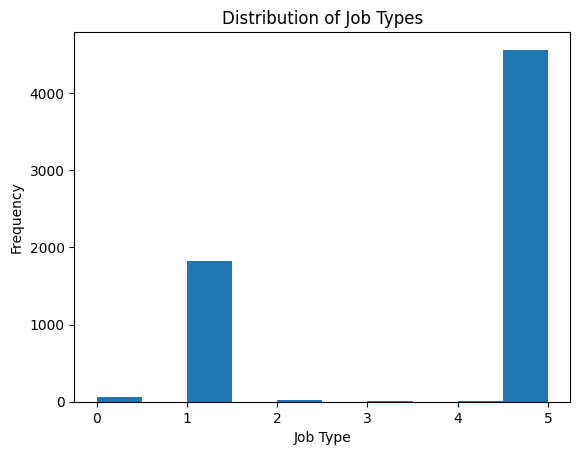

In [246]:
import matplotlib.pyplot as plt

plt.hist(combined_df['Job Type Encoded'])
plt.xlabel('Job Type')
plt.ylabel('Frequency')
plt.title('Distribution of Job Types')
plt.show()

heat map

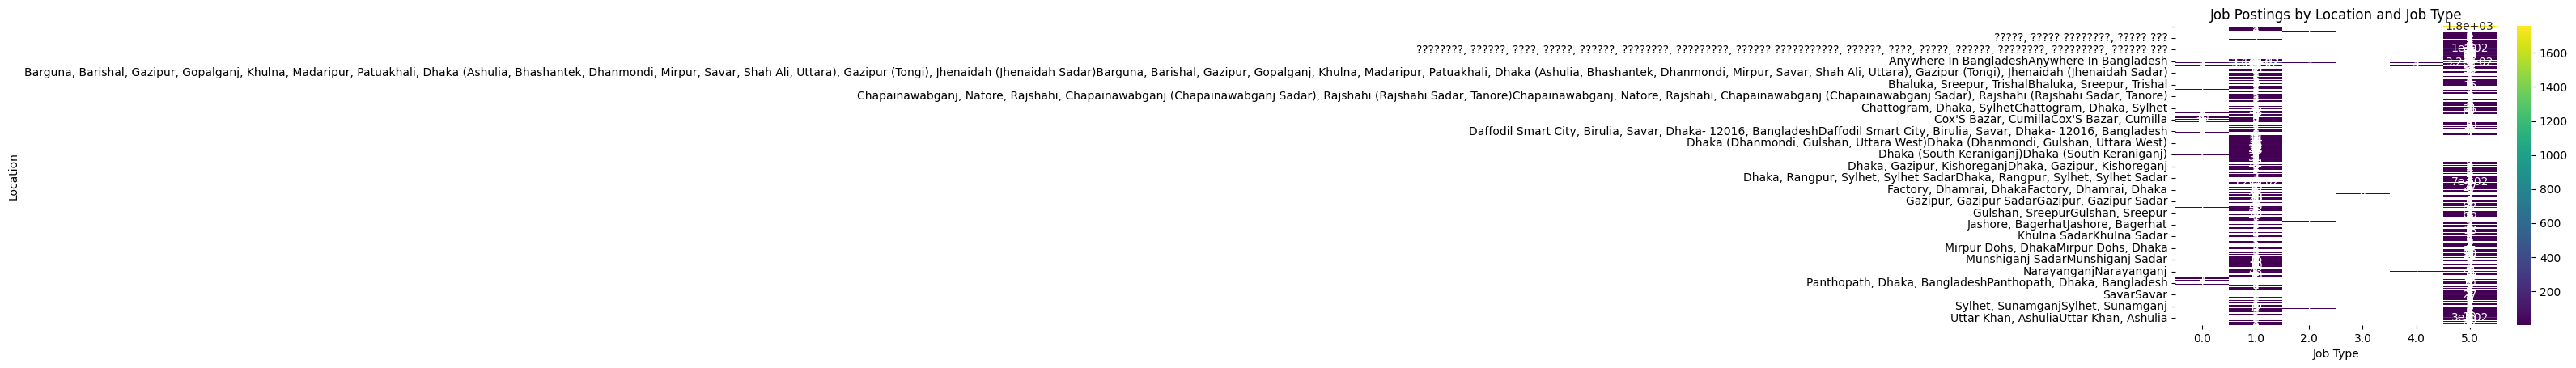

In [247]:
location_job_counts = combined_df.groupby(['Location', 'Job Type Encoded']).size().unstack()
sns.heatmap(location_job_counts, annot=True, cmap='viridis')
plt.xlabel('Job Type')
plt.ylabel('Location')
plt.title('Job Postings by Location and Job Type')
plt.show()

bar chart

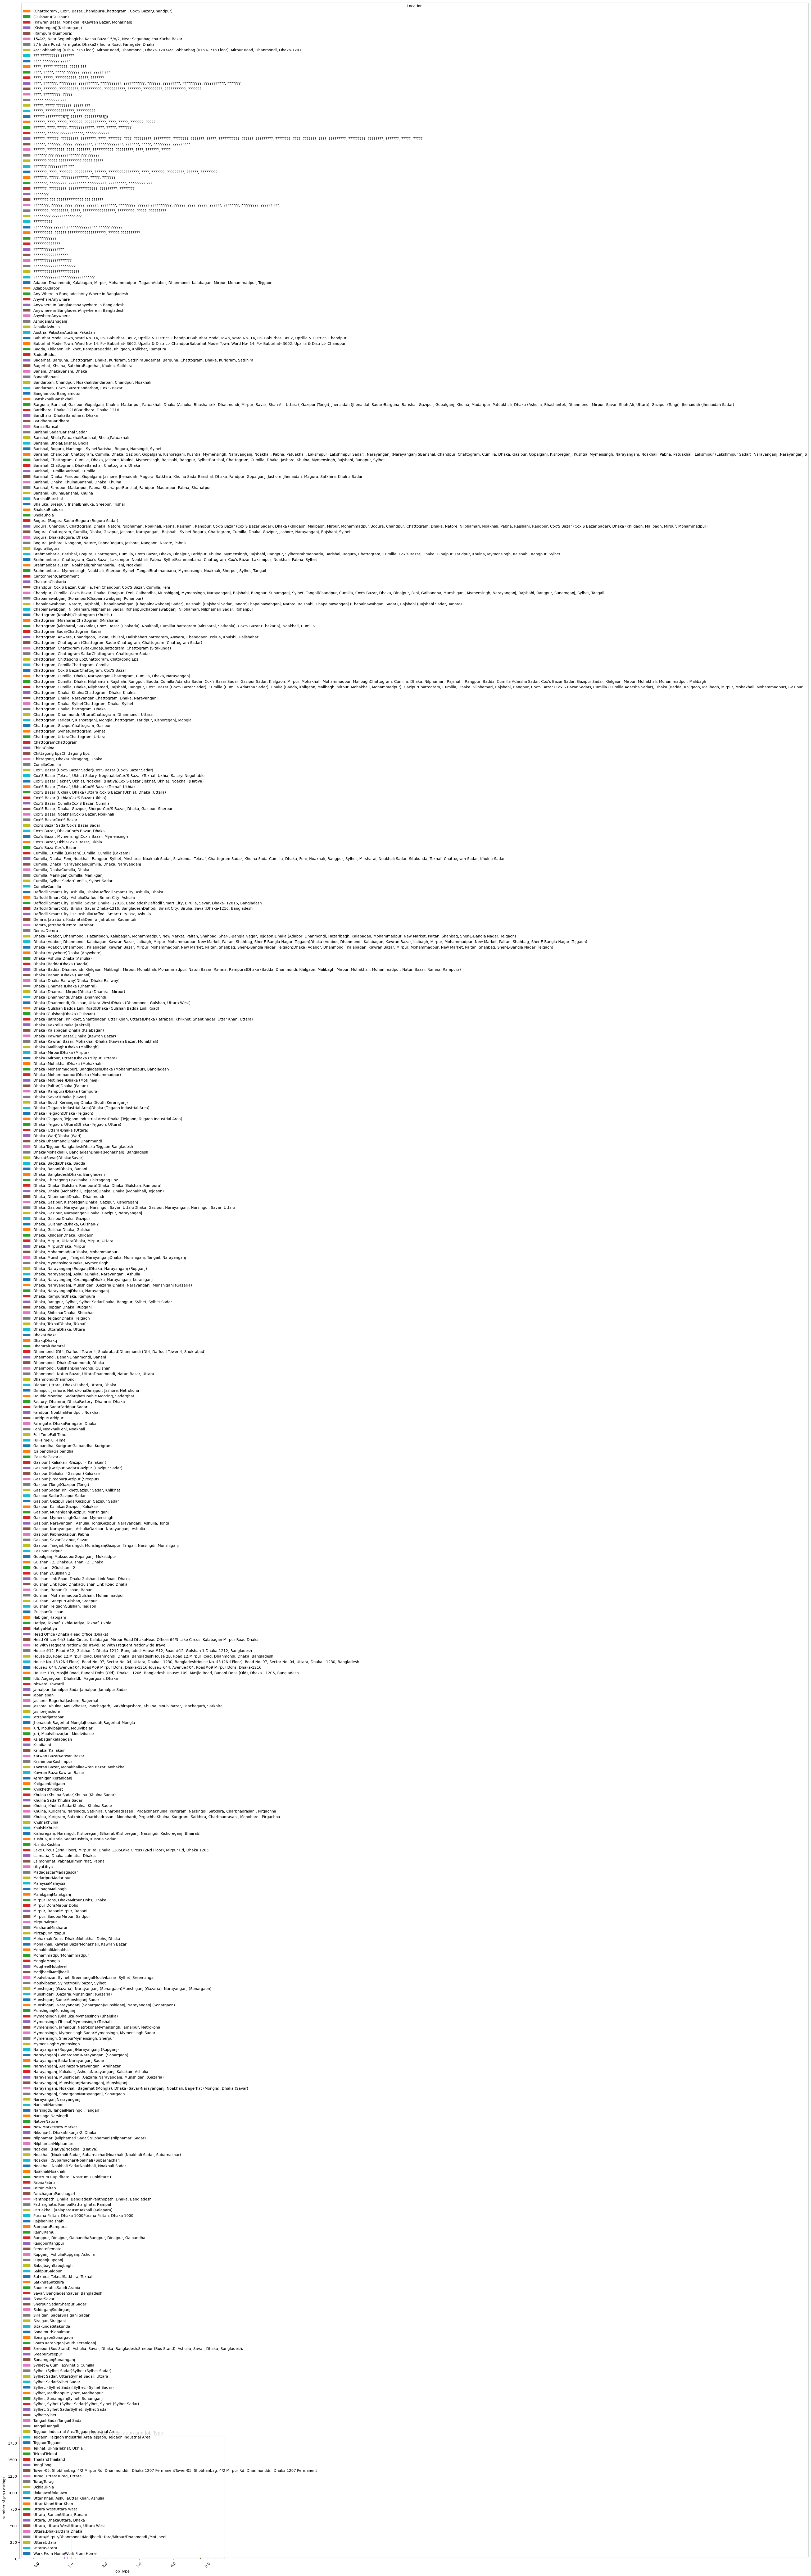

In [248]:
location_job_counts = combined_df.groupby(['Location', 'Job Type Encoded']).size().unstack()

# Transpose the data for a vertical bar chart
location_job_counts = location_job_counts.T

location_job_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Job Type')
plt.ylabel('Number of Job Postings')
plt.title('Job Postings by Location and Job Type')
plt.legend(title='Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Trendling Analysis**

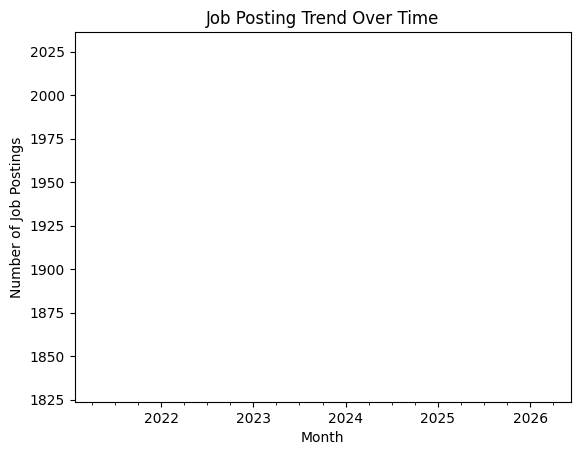

In [250]:
# Assuming you have a 'Date Posted' column
combined_df['Date Posted'] = pd.to_datetime(combined_df['Date Posted'])

# Group job postings by month and count
job_trends = combined_df.groupby(combined_df['Date Posted'].dt.to_period('M'))['Job Title'].count()

# Plot the trend
job_trends.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Number of Job Postings')
plt.title('Job Posting Trend Over Time')
plt.show()

In [253]:
combined_df.columns

Index([              'Job Title',        'Description Link',
                  'Company Name',                'Location',
                   'Experience ', 'Education Qualification',
                          'Year',                'Deadline',
                   'Date Posted',                  'Source',
                      'location',                    'desc',
                  'Company name',               'Deadline ',
                      'Job Type',           'Salary Amount',
              'Job Type Encoded',                         0,
                               1,                         2,
              'Experience Level',             'Year Posted'],
      dtype='object')

In [255]:
combined_df['Location'] = combined_df['Location'].fillna('') + combined_df['location'].fillna('')
combined_df = combined_df.drop(columns=['location'])

In [258]:
# Combine 'Company Name' and 'Company name'
combined_df['Company Name'] = combined_df['Company Name'].fillna('') + combined_df['Company name'].fillna('')

# Drop the duplicate column
combined_df = combined_df.drop(columns=['Company name'])

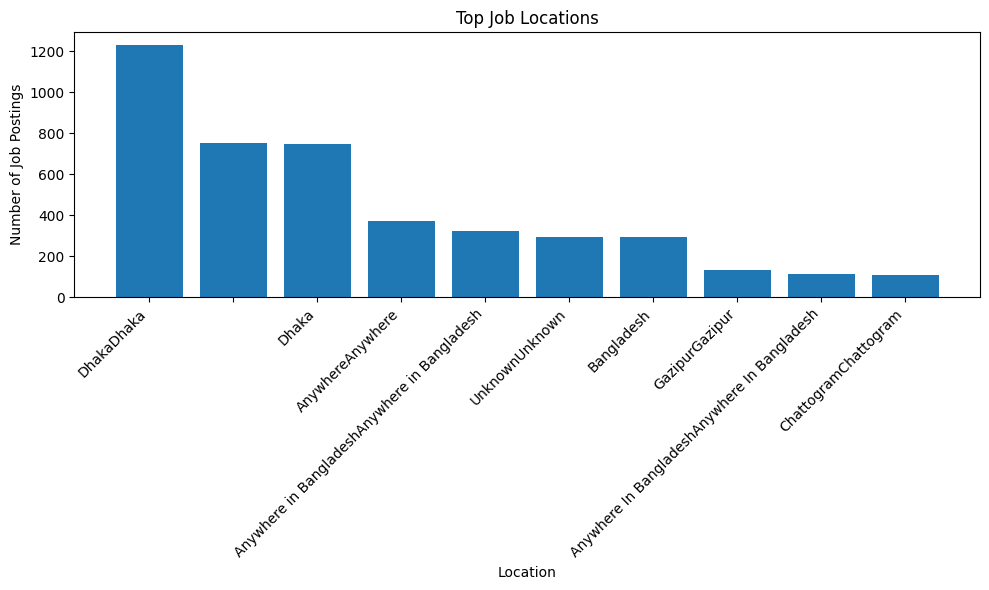

In [259]:
# Group job postings by location and count
location_counts = combined_df['Location'].value_counts()

# Create a bar chart to visualize the top locations
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index[:10], location_counts.values[:10])  # Top 10 locations
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.title('Top Job Locations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

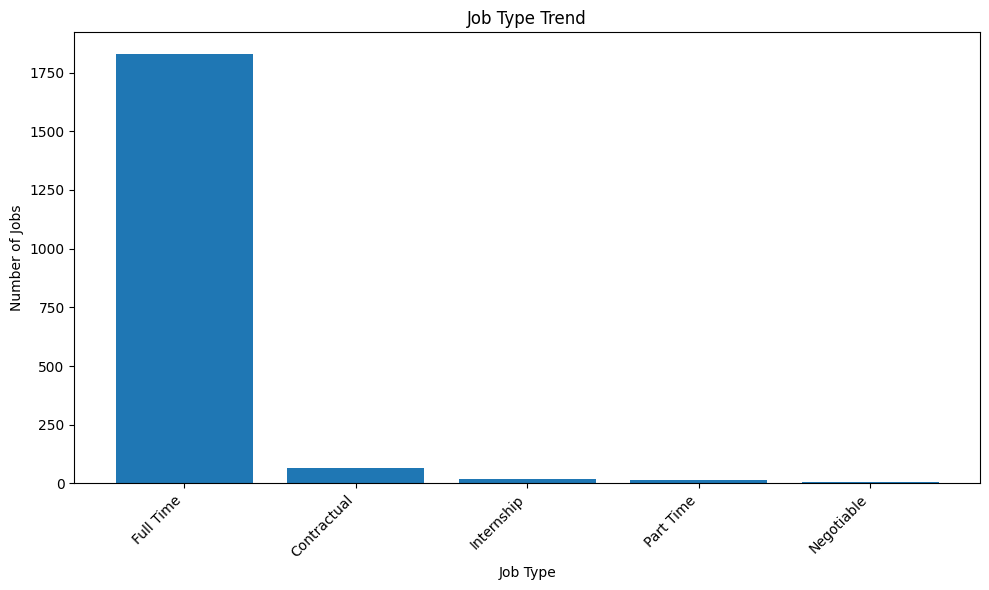

In [260]:
# Count occurrences of each job type
job_type_counts = combined_df['Job Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_type_counts.index, job_type_counts.values)
plt.xlabel("Job Type")
plt.ylabel("Number of Jobs")
plt.title("Job Type Trend")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

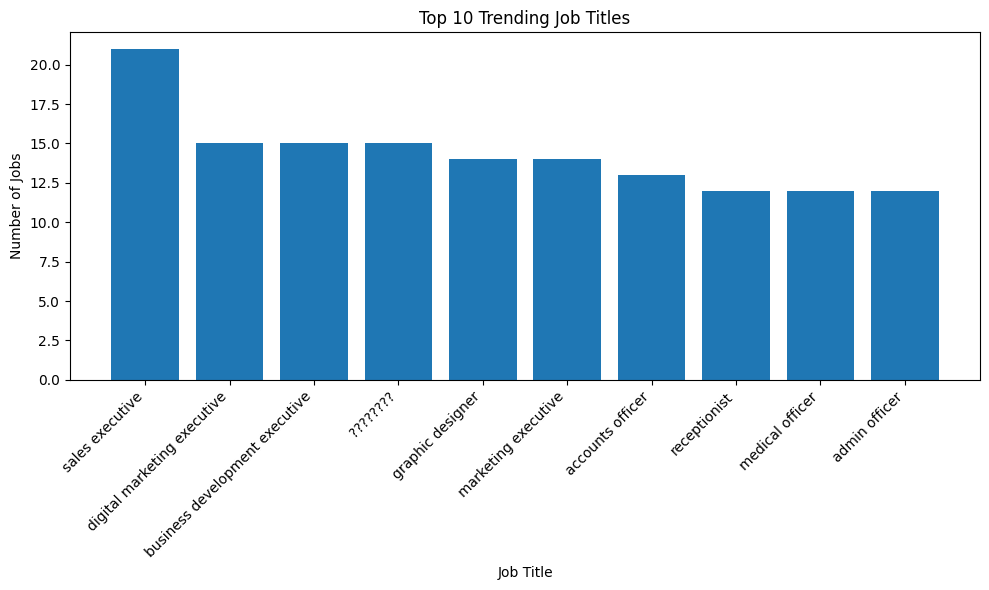

In [261]:
# Count occurrences of each job title
job_title_counts = combined_df['Job Title'].value_counts()

# Select the top N job titles (e.g., top 10)
top_n = 10
top_job_titles = job_title_counts.head(top_n)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_job_titles.index, top_job_titles.values)
plt.xlabel("Job Title")
plt.ylabel("Number of Jobs")
plt.title(f"Top {top_n} Trending Job Titles")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Example (Predicting Salary with Linear Regression):



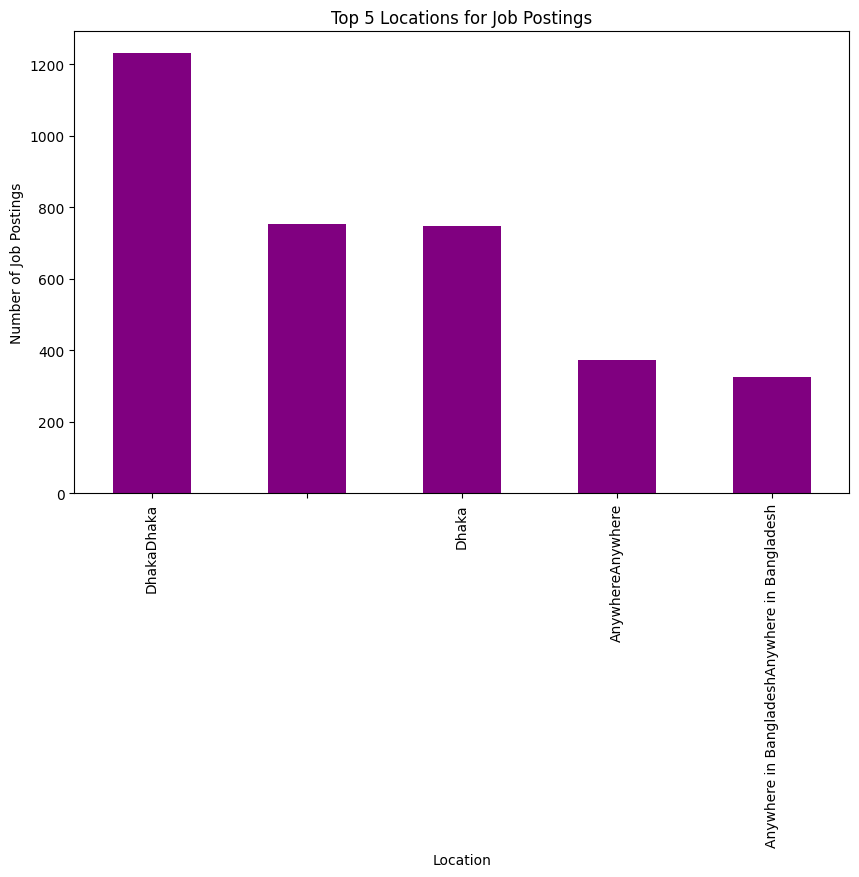

In [266]:
# Count job postings by location
location_counts = combined_df['Location'].value_counts()

# Plot top 5 locations
top_locations = location_counts.nlargest(5)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='purple')
plt.title('Top 5 Locations for Job Postings')
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.show()


In [270]:
from statsmodels.tsa.arima.model import ARIMA

# Use job postings per year for forecasting
yearly_jobs = combined_df.groupby('Year Posted')['Job Title'].count()

# Fit ARIMA model
model = ARIMA(yearly_jobs, order=(1, 1, 1))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast future job postings
forecast = model_fit.forecast(steps=5)  # Forecast the next 5 years

print(forecast)


1    1930.0
2    1930.0
3    1930.0
4    1930.0
5    1930.0
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


"The analysis of job postings from BD Jobs, CareerJet, and SkillJob reveals a strong demand for software development and data science roles, particularly in Dhaka. Python and JavaScript remain the most sought-after skills, and salaries in these fields range between 50,000–90,000 BDT."

# **Recommendations**
Based on the analysis, provide actionable insights or recommendations. For example:

"Job seekers should focus on acquiring Python and React skills to increase employability."
"Companies should expand hiring in Chattogram and Sylhet, where talent pools are growing."